In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
# https://github.com/PacktPublishing/Artificial-Intelligence-with-Python/blob/master/Chapter%2002/code/utilities.py
def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [51]:
input_file = "data/data_multivar_nb.txt"

In [52]:
data = np.loadtxt(input_file, delimiter=',')
X, y =data[:, :-1], data[:, -1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Создание наивного байесовского классификатора
classifier = GaussianNB()

In [55]:
# Тренировкка классификатора
classifier.fit(X_train, y_train)

GaussianNB()

In [56]:
# Прогнозирование значений для тренировочных данных
y_pred = classifier.predict(X_test)

In [65]:
# Вычисление качества классификатора
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy of Naive Bayes classifier = {accuracy * 100}%")
print(f"Precision of Naive Bayes classifier =: {100 * precision:.4f}%")
print(f"Recall of Naive Bayes classifier =: {100 * recall:.4f}%")
print(f"F1-score of Naive Bayes classifier =: {100 * f1:.4f}%")

Accuracy of Naive Bayes classifier = 98.75%
Precision of Naive Bayes classifier =: 98.8542%
Recall of Naive Bayes classifier =: 98.7500%
F1-score of Naive Bayes classifier =: 98.7626%


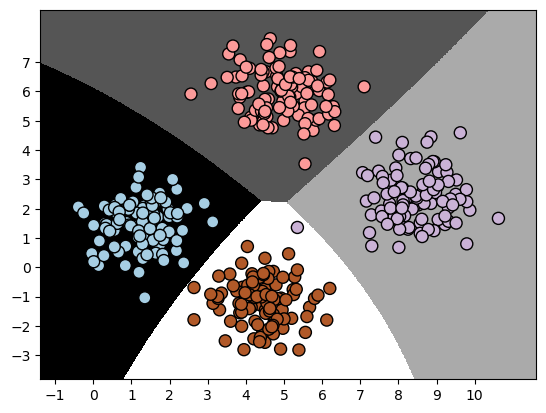

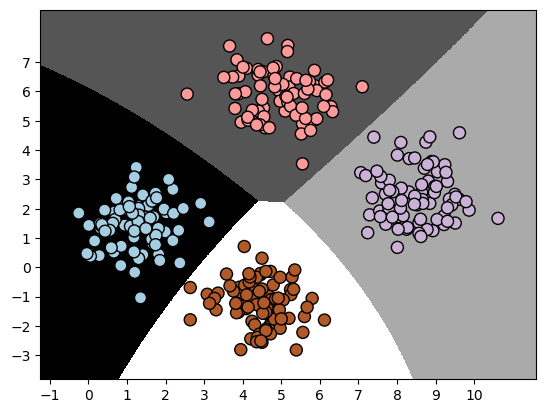

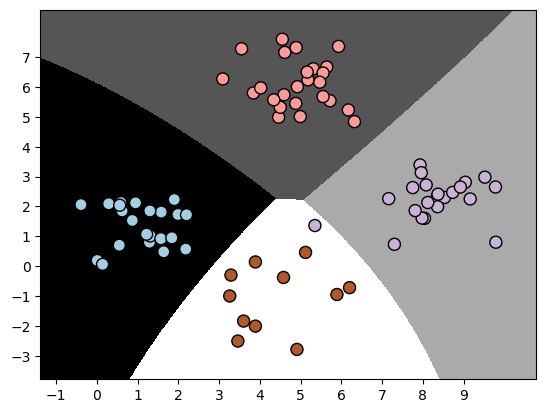

In [63]:
# Визуализация результатов работы классификатора
visualize_classifier(classifier, X, y)
visualize_classifier(classifier, X_train, y_train)
visualize_classifier(classifier, X_test, y_test)